In [1]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

from mne import read_epochs, set_log_level
from mne.decoding import CSP
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [2]:
set_log_level('warning')
epochs = read_epochs('ica_epo.fif')

In [3]:
def dwt_coeff(x, lvl=1, db='db2'):
    coeff = pywt.wavedec(x, db, mode='sym')
    return coeff[lvl]

def avg_pwr(x):
    return np.average(x)

def standarize(array, mean, std):
    return (array-mean)/std

def energy(x):
    return np.sum(x**2)

def std(x):
    return np.std(x)

def max_coeff(x):
    return np.max(x)

def max_coeff(x):
    return np.min(x)


In [4]:
pca = PCA(n_components=0.9)
le = LabelEncoder()
scaler = StandardScaler()
linear_svm = svm.SVC()
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')

Load epochs

In [11]:
conditions = ['left','rest']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.4,500,200)

Vizualize data

C:\Users\Alberto\AppData\Local\Temp\ipykernel_9600\2025580989.py:2: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = subset.copy().crop(.4,1.9).filter(2,7).get_data()


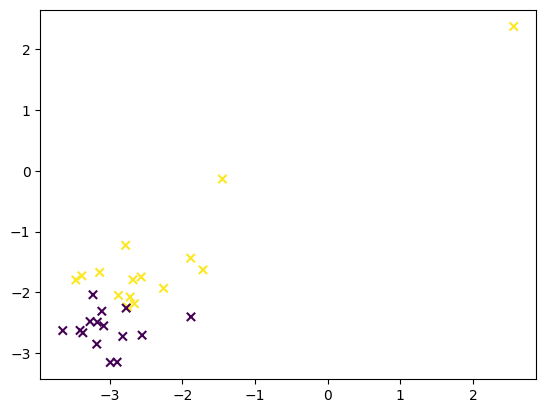

In [12]:
csp = CSP(n_components=2, reg=None, log=True, norm_trace=False, rank='info')
train_data = subset.copy().crop(.4,1.9).filter(2,7).get_data()    
data = csp.fit_transform(train_data, y)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=y, marker='x')

In [13]:
csp_test_classifiers(2,time_config, 7, 2)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_9600\2277204876.py:3: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Lo

Epoch 1/15
1/1 [==============================] - 1s 715ms/step - loss: 0.2468 - accuracy: 0.6250
Epoch 2/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2459 - accuracy: 0.6250
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2449 - accuracy: 0.6250
Epoch 4/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2440 - accuracy: 0.6250
Epoch 5/15
1/1 [==============================] - 0s 13ms/step - loss: 0.2430 - accuracy: 0.6667
Epoch 6/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2422 - accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2413 - accuracy: 0.7083
Epoch 8/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2405 - accuracy: 0.7083
Epoch 9/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2396 - accuracy: 0.7083
Epoch 10/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2388 - accuracy: 0.7083
Epoch 11/15
1/1 [=============

1/1 [==============================] - 0s 122ms/step - loss: 0.2639 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 1s 547ms/step - loss: 0.2995 - accuracy: 0.7500
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2986 - accuracy: 0.7500
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2977 - accuracy: 0.7500
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2968 - accuracy: 0.7500
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2959 - accuracy: 0.7500
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2950 - accuracy: 0.7500
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2941 - accuracy: 0.7500
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2932 - accuracy: 0.7500
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2923 - accuracy: 0.7500
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 9ms/step - loss: 0.3266 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2711 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 547ms/step - loss: 0.2048 - accuracy: 0.6250
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2043 - accuracy: 0.6250
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2038 - accuracy: 0.6250
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2033 - accuracy: 0.6250
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2027 - accuracy: 0.6250
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2023 - accuracy: 0.6250
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2018 - accuracy: 0.6250
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2013 - accuracy: 0.6250
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3433 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3421 - accuracy: 0.4167
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3409 - accuracy: 0.4167
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3397 - accuracy: 0.4167
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3385 - accuracy: 0.4167
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3373 - accuracy: 0.4583
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3361 - accuracy: 0.4583
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3349 - accuracy: 0.4583
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3338 - accuracy: 0.4583
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3326 - accuracy: 0.4583
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.3647 - accuracy: 0.2500
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3642 - accuracy: 0.2500
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3636 - accuracy: 0.2500
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3631 - accuracy: 0.2500
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3626 - accuracy: 0.2500
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3621 - accuracy: 0.2500
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3616 - accuracy: 0.2500
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.3784 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 1s 511ms/step - loss: 0.4693 - accuracy: 0.1250
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4683 - accuracy: 0.2500
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2122 - accuracy: 0.6667
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2116 - accuracy: 0.7500
Epoch 15/15
1/1 [==============================] - 0s 122ms/step - loss: 0.2217 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 541ms/step - loss: 0.3499 - accuracy: 0.3750
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3492 - accuracy: 0.4167
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3486 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3480 - accuracy: 0.4167
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3474 - accuracy: 0.4167
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3468 - accuracy: 0.4167
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3461 - accuracy: 0.4167
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2960 - accuracy: 0.5417
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2951 - accuracy: 0.5417
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2942 - accuracy: 0.5417
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2933 - accuracy: 0.5417
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2924 - accuracy: 0.5417
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2914 - accuracy: 0.5417
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2905 - accuracy: 0.5417
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2896 - accuracy: 0.5417
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2887 - accuracy: 0.5417
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2878 - accuracy: 0.5417
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 7ms/step - loss: 0.1963 - accuracy: 0.7917
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1960 - accuracy: 0.7917
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1957 - accuracy: 0.7917
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1954 - accuracy: 0.7917
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1951 - accuracy: 0.7917
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1948 - accuracy: 0.7917
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1945 - accuracy: 0.7917
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1942 - accuracy: 0.7917
Epoch 15/15
1/1 [==============================] - 0s 127ms/step - loss: 0.2679 - accuracy: 0.6667
Epoch 1/15
1/1 [==============================] - 1s 632ms/step - loss: 0.2615 - accuracy: 0.4167
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3752 - accuracy: 0.2083
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3743 - accuracy: 0.2083
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3734 - accuracy: 0.2083
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.3464 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 1s 558ms/step - loss: 0.2754 - accuracy: 0.4583
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2748 - accuracy: 0.4583
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2742 - accuracy: 0.4583
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2736 - accuracy: 0.4583
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2730 - accuracy: 0.4583
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2724 - accuracy: 0.4583
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 592ms/step - loss: 0.2879 - accuracy: 0.2917
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2871 - accuracy: 0.2917
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2863 - accuracy: 0.2917
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2855 - accuracy: 0.2917
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2848 - accuracy: 0.2917
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2840 - accuracy: 0.2917
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2832 - accuracy: 0.3333
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2824 - accuracy: 0.3333
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2817 - accuracy: 0.3333
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2809 - accuracy: 0.3333
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.2321 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2314 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2307 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2300 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2293 - accuracy: 0.5417
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2286 - accuracy: 0.5417
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2279 - accuracy: 0.5417
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2273 - accuracy: 0.5417
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2267 - accuracy: 0.5417
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.2567 - accuracy: 0.6667
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.4674 - accuracy: 0.1667
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4665 - accuracy: 0.1667
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4655 - accuracy: 0.1667
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4646 - accuracy: 0.1667
Epoch 15/15
1/1 [==============================] - 0s 120ms/step - loss: 0.2478 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 1s 532ms/step - loss: 0.3620 - accuracy: 0.4583
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3612 - accuracy: 0.2500
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3604 - accuracy: 0.2500
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3596 - accuracy: 0.2500
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3587 - accuracy: 0.2500
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 120ms/step - loss: 0.3799 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 1s 529ms/step - loss: 0.1840 - accuracy: 0.7917
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1832 - accuracy: 0.7917
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1825 - accuracy: 0.7917
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1817 - accuracy: 0.7917
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1809 - accuracy: 0.7917
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1801 - accuracy: 0.7917
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1794 - accuracy: 0.7917
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1786 - accuracy: 0.7917
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1779 - accuracy: 0.7917
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2786 - accuracy: 0.4167
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2772 - accuracy: 0.4583
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2758 - accuracy: 0.4583
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2745 - accuracy: 0.4583
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2731 - accuracy: 0.4583
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2718 - accuracy: 0.4583
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2706 - accuracy: 0.4583
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2693 - accuracy: 0.5417
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2680 - accuracy: 0.5417
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2668 - accuracy: 0.5417
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3879 - accuracy: 0.2083
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3870 - accuracy: 0.2083
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3861 - accuracy: 0.2083
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3852 - accuracy: 0.2083
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3844 - accuracy: 0.2083
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.3254 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 511ms/step - loss: 0.2977 - accuracy: 0.3750
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2967 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2957 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2947 - accuracy: 0.5000
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 115ms/step - loss: 0.1650 - accuracy: 0.6667
Epoch 1/15
1/1 [==============================] - 1s 513ms/step - loss: 0.3140 - accuracy: 0.4583
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3133 - accuracy: 0.5417
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3126 - accuracy: 0.5417
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3119 - accuracy: 0.5833
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3112 - accuracy: 0.5833
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3105 - accuracy: 0.5833
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3099 - accuracy: 0.5833
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3092 - accuracy: 0.5417
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3085 - accuracy: 0.5417
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2448 - accuracy: 0.5417
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2439 - accuracy: 0.5417
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2430 - accuracy: 0.5833
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2421 - accuracy: 0.6250
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2412 - accuracy: 0.6250
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2403 - accuracy: 0.6250
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2395 - accuracy: 0.6667
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2386 - accuracy: 0.6667
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2377 - accuracy: 0.6667
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2368 - accuracy: 0.6667
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2872 - accuracy: 0.4167
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2863 - accuracy: 0.4167
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2854 - accuracy: 0.4167
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2846 - accuracy: 0.4167
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2837 - accuracy: 0.4167
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2829 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2588 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 508ms/step - loss: 0.2572 - accuracy: 0.4583
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2565 - accuracy: 0.5833
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2558 - accuracy: 0.5833
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.4445 - accuracy: 0.2500
Epoch 15/15
1/1 [==============================] - 0s 109ms/step - loss: 0.3731 - accuracy: 0.6667
Epoch 1/15
1/1 [==============================] - 1s 522ms/step - loss: 0.2493 - accuracy: 0.5417
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2480 - accuracy: 0.5417
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2467 - accuracy: 0.5417
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2455 - accuracy: 0.5417
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2442 - accuracy: 0.5417
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2429 - accuracy: 0.5417
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2417 - accuracy: 0.5417
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2405 - accuracy: 0.5417
Epoch 9/15
1/1 [==============================

In [14]:
dwt_test_classifiers(1,'db3',time_config)

Epoch 1/15
1/1 [==============================] - 1s 518ms/step - loss: 0.3285 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3274 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3263 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3252 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3241 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3230 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3220 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3209 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3198 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3187 - accuracy: 0.5000
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 8ms/step - loss: 0.2675 - accuracy: 0.5833
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2663 - accuracy: 0.5833
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2652 - accuracy: 0.5833
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2640 - accuracy: 0.5833
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2629 - accuracy: 0.5833
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2617 - accuracy: 0.5833
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2606 - accuracy: 0.5833
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2594 - accuracy: 0.5833
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2583 - accuracy: 0.5833
Epoch 15/15
1/1 [==============================] - 0s 127ms/step - loss: 0.3209 - accuracy: 0.1667
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3980 - accuracy: 0.3750
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3970 - accuracy: 0.3750
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3960 - accuracy: 0.3750
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3950 - accuracy: 0.3750
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.3257 - accuracy: 0.1667
Epoch 1/15
1/1 [==============================] - 1s 502ms/step - loss: 0.2576 - accuracy: 0.5417
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2560 - accuracy: 0.5417
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2544 - accuracy: 0.5417
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2529 - accuracy: 0.5417
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2513 - accuracy: 0.5417
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 122ms/step - loss: 0.2774 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 1s 527ms/step - loss: 0.3011 - accuracy: 0.3750
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2998 - accuracy: 0.3750
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2984 - accuracy: 0.3750
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2971 - accuracy: 0.3750
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2958 - accuracy: 0.3750
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2945 - accuracy: 0.3750
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2931 - accuracy: 0.4167
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2918 - accuracy: 0.4167
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2905 - accuracy: 0.4167
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 0.3331 - accuracy: 0.4167
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3318 - accuracy: 0.4167
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3306 - accuracy: 0.4167
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3294 - accuracy: 0.4167
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3281 - accuracy: 0.4167
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3269 - accuracy: 0.4167
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3257 - accuracy: 0.4167
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3245 - accuracy: 0.4167
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3232 - accuracy: 0.4167
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3220 - accuracy: 0.4167
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 7ms/step - loss: 0.3080 - accuracy: 0.5833
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3070 - accuracy: 0.5833
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3060 - accuracy: 0.5833
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3050 - accuracy: 0.5833
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3039 - accuracy: 0.5833
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2703 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 1s 509ms/step - loss: 0.3179 - accuracy: 0.4583
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3170 - accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3160 - accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3150 - accuracy: 0.3333
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 116ms/step - loss: 0.3049 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 513ms/step - loss: 0.2499 - accuracy: 0.5833
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2491 - accuracy: 0.5833
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2483 - accuracy: 0.5833
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2475 - accuracy: 0.5833
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2467 - accuracy: 0.6250
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2459 - accuracy: 0.6250
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2452 - accuracy: 0.6250
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2444 - accuracy: 0.6250
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2437 - accuracy: 0.6250
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.1936 - accuracy: 0.8333
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1927 - accuracy: 0.8333
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1919 - accuracy: 0.8333
Epoch 7/15
1/1 [==============================] - 0s 14ms/step - loss: 0.1911 - accuracy: 0.8333
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.1902 - accuracy: 0.8333
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1894 - accuracy: 0.8333
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1886 - accuracy: 0.8333
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1878 - accuracy: 0.8333
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1870 - accuracy: 0.8333
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1862 - accuracy: 0.8333
Epoch 14/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2088 - accuracy: 0.5417
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2080 - accuracy: 0.5417
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2072 - accuracy: 0.5833
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2064 - accuracy: 0.5833
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2055 - accuracy: 0.5833
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2047 - accuracy: 0.5833
Epoch 15/15
1/1 [==============================] - 0s 124ms/step - loss: 0.2214 - accuracy: 0.8333
Epoch 1/15
1/1 [==============================] - 1s 537ms/step - loss: 0.3262 - accuracy: 0.4583
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3253 - accuracy: 0.4583
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3244 - accuracy: 0.4583
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2555 - accuracy: 0.5417
Epoch 15/15
1/1 [==============================] - 0s 121ms/step - loss: 0.1946 - accuracy: 0.8333
Epoch 1/15
1/1 [==============================] - 1s 526ms/step - loss: 0.2954 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2943 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2933 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2923 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2913 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2902 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2892 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2882 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3179 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3167 - accuracy: 0.4167
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3156 - accuracy: 0.4167
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3145 - accuracy: 0.4167
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3134 - accuracy: 0.4167
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3123 - accuracy: 0.4167
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3112 - accuracy: 0.4167
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3101 - accuracy: 0.4167
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3090 - accuracy: 0.4167
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3079 - accuracy: 0.4167
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2806 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2792 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2779 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2765 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2751 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2737 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2724 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 137ms/step - loss: 0.1551 - accuracy: 0.8333
Epoch 1/15
1/1 [==============================] - 1s 528ms/step - loss: 0.3408 - accuracy: 0.3750
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3395 - accuracy: 0.3750
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2973 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2962 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2532 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 535ms/step - loss: 0.2863 - accuracy: 0.3750
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2854 - accuracy: 0.3750
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2844 - accuracy: 0.3750
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2834 - accuracy: 0.3750
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2824 - accuracy: 0.3750
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2814 - accuracy: 0.3750
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2804 - accuracy: 0.3750
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2447 - accuracy: 0.5417
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2440 - accuracy: 0.5833
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2432 - accuracy: 0.5833
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2425 - accuracy: 0.5833
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2417 - accuracy: 0.5833
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2410 - accuracy: 0.5833
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2403 - accuracy: 0.5833
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2395 - accuracy: 0.5833
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2388 - accuracy: 0.5833
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2380 - accuracy: 0.5833
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 7ms/step - loss: 0.2710 - accuracy: 0.4583
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2702 - accuracy: 0.4583
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2695 - accuracy: 0.4583
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2687 - accuracy: 0.4583
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2679 - accuracy: 0.4583
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2672 - accuracy: 0.4583
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2664 - accuracy: 0.4583
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2657 - accuracy: 0.4583
Epoch 15/15
1/1 [==============================] - 0s 132ms/step - loss: 0.2904 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 1s 513ms/step - loss: 0.2309 - accuracy: 0.6250
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2757 - accuracy: 0.5417
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2749 - accuracy: 0.5417
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2741 - accuracy: 0.5417
Epoch 15/15
1/1 [==============================] - 0s 124ms/step - loss: 0.2602 - accuracy: 0.5000
Epoch 1/15
1/1 [==============================] - 1s 536ms/step - loss: 0.3447 - accuracy: 0.4167
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3435 - accuracy: 0.4167
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3423 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3411 - accuracy: 0.4167
Epoch 5/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3399 - accuracy: 0.4167
Epoch 6/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3387 - accuracy: 0.4167
Epoch 7/15
1/1 [============================

1/1 [==============================] - 1s 728ms/step - loss: 0.2862 - accuracy: 0.3750
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2853 - accuracy: 0.4167
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2843 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2834 - accuracy: 0.4167
Epoch 5/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2825 - accuracy: 0.4167
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2816 - accuracy: 0.4167
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2807 - accuracy: 0.4167
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2798 - accuracy: 0.4167
Epoch 9/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2789 - accuracy: 0.4167
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2780 - accuracy: 0.4167
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2447 - accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2437 - accuracy: 0.6667
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2426 - accuracy: 0.6667
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2415 - accuracy: 0.6667
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2405 - accuracy: 0.6667
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2394 - accuracy: 0.6667
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2384 - accuracy: 0.6667
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2373 - accuracy: 0.6667
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2363 - accuracy: 0.6667
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.1924 - accuracy: 0.6667
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.3274 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3260 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3247 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3234 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 124ms/step - loss: 0.2878 - accuracy: 0.1667
Epoch 1/15
1/1 [==============================] - 1s 676ms/step - loss: 0.2954 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2947 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2939 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2932 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2925 - accuracy: 0.5000
Epoch 6/15
1/1 [===========================

left vs right

In [15]:
conditions = ['left','right']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.4,300,100)

In [16]:
csp_test_classifiers(10,time_config, 7, 2)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_9600\2277204876.py:3: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Lo

Epoch 1/15
1/1 [==============================] - 1s 766ms/step - loss: 0.2671 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2657 - accuracy: 0.4583
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2644 - accuracy: 0.4583
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2630 - accuracy: 0.4583
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.4583
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2604 - accuracy: 0.4583
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2591 - accuracy: 0.4583
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2578 - accuracy: 0.4583
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2565 - accuracy: 0.4583
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2551 - accuracy: 0.4583
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 5ms/step - loss: 0.2960 - accuracy: 0.4583
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2946 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2932 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2918 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2904 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2891 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2878 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2865 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2852 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 1s 515ms/step - loss: 0.2639 - accuracy: 0.5714
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2864 - accuracy: 0.5417
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2853 - accuracy: 0.5417
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2841 - accuracy: 0.5417
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2830 - accuracy: 0.5417
Epoch 15/15
1/1 [==============================] - 0s 129ms/step - loss: 0.2691 - accuracy: 0.1429
Epoch 1/15
1/1 [==============================] - 1s 528ms/step - loss: 0.4116 - accuracy: 0.3750
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4107 - accuracy: 0.3750
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4098 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.4089 - accuracy: 0.4167
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4080 - accuracy: 0.4167
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 123ms/step - loss: 0.2110 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 1s 581ms/step - loss: 0.2677 - accuracy: 0.6250
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2666 - accuracy: 0.6250
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2655 - accuracy: 0.6250
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2644 - accuracy: 0.6250
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2634 - accuracy: 0.6250
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2623 - accuracy: 0.6250
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2613 - accuracy: 0.6250
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2602 - accuracy: 0.6250
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2592 - accuracy: 0.6250
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 0.2946 - accuracy: 0.4583
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2936 - accuracy: 0.4583
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2927 - accuracy: 0.4583
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2917 - accuracy: 0.4583
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2908 - accuracy: 0.4583
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2898 - accuracy: 0.4583
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2888 - accuracy: 0.4583
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2879 - accuracy: 0.4583
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2869 - accuracy: 0.4583
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2860 - accuracy: 0.4583
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3477 - accuracy: 0.3750
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3466 - accuracy: 0.3750
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3454 - accuracy: 0.3750
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3443 - accuracy: 0.4167
Epoch 14/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3431 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 124ms/step - loss: 0.2878 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 598ms/step - loss: 0.3213 - accuracy: 0.3750
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3203 - accuracy: 0.4167
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3193 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3183 - accuracy: 0.4167
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 128ms/step - loss: 0.2501 - accuracy: 0.2857
Epoch 1/15
1/1 [==============================] - 1s 553ms/step - loss: 0.3057 - accuracy: 0.4583
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3045 - accuracy: 0.4583
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3032 - accuracy: 0.4583
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3019 - accuracy: 0.4583
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3007 - accuracy: 0.4583
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2994 - accuracy: 0.4583
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2982 - accuracy: 0.4583
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2969 - accuracy: 0.4583
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2957 - accuracy: 0.4583
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 9ms/step - loss: 0.2653 - accuracy: 0.4583
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2644 - accuracy: 0.4583
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2634 - accuracy: 0.4583
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2625 - accuracy: 0.4583
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2616 - accuracy: 0.4583
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2606 - accuracy: 0.4583
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2597 - accuracy: 0.4583
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2588 - accuracy: 0.4583
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2579 - accuracy: 0.4583
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2570 - accuracy: 0.4583
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3411 - accuracy: 0.3750
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3398 - accuracy: 0.3750
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3386 - accuracy: 0.3750
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3374 - accuracy: 0.3750
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3361 - accuracy: 0.3750
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3349 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.3947 - accuracy: 0.1429
Epoch 1/15
1/1 [==============================] - 1s 508ms/step - loss: 0.3623 - accuracy: 0.4167
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3610 - accuracy: 0.4167
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3597 - accuracy: 0.4167
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2846 - accuracy: 0.5417
Epoch 15/15
1/1 [==============================] - 0s 119ms/step - loss: 0.2558 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 500ms/step - loss: 0.3664 - accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3650 - accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 0s 13ms/step - loss: 0.3636 - accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3621 - accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3607 - accuracy: 0.3333
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3593 - accuracy: 0.3333
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3579 - accuracy: 0.3333
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3565 - accuracy: 0.3333
Epoch 9/15
1/1 [=============================

1/1 [==============================] - 0s 7ms/step - loss: 0.3859 - accuracy: 0.3750
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3846 - accuracy: 0.3750
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3833 - accuracy: 0.3750
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3821 - accuracy: 0.3750
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3808 - accuracy: 0.3750
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3795 - accuracy: 0.3750
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3782 - accuracy: 0.4167
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3770 - accuracy: 0.4167
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3757 - accuracy: 0.4167
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3744 - accuracy: 0.4167
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.3524 - accuracy: 0.4167
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3513 - accuracy: 0.4167
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3503 - accuracy: 0.4167
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3492 - accuracy: 0.4167
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3482 - accuracy: 0.4167
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3471 - accuracy: 0.3750
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3460 - accuracy: 0.3750
Epoch 15/15
1/1 [==============================] - 0s 114ms/step - loss: 0.2335 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 519ms/step - loss: 0.3009 - accuracy: 0.5417
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3001 - accuracy: 0.5417
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2888 - accuracy: 0.4167
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2879 - accuracy: 0.4583
Epoch 15/15
1/1 [==============================] - 0s 109ms/step - loss: 0.2493 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 516ms/step - loss: 0.2861 - accuracy: 0.4583
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2853 - accuracy: 0.4583
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2846 - accuracy: 0.4583
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2839 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2831 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2824 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2817 - accuracy: 0.5000
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2880 - accuracy: 0.4583
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2868 - accuracy: 0.4583
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2857 - accuracy: 0.4583
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2845 - accuracy: 0.4583
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2834 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2823 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2812 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2801 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2790 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2778 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.2204 - accuracy: 0.6250
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2195 - accuracy: 0.5833
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2186 - accuracy: 0.5833
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2177 - accuracy: 0.5833
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2169 - accuracy: 0.5833
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2160 - accuracy: 0.5833
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2151 - accuracy: 0.5833
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2143 - accuracy: 0.5833
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2304 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 0s 489ms/step - loss: 0.3917 - accuracy: 0.3750
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2339 - accuracy: 0.6250
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2327 - accuracy: 0.6250
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2315 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2069 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 1s 516ms/step - loss: 0.2681 - accuracy: 0.3750
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2674 - accuracy: 0.3750
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2668 - accuracy: 0.3750
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2662 - accuracy: 0.3750
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2655 - accuracy: 0.3750
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2649 - accuracy: 0.3750
Epoch 7/15
1/1 [============================

1/1 [==============================] - 0s 498ms/step - loss: 0.2879 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2868 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2856 - accuracy: 0.5417
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2845 - accuracy: 0.5417
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2833 - accuracy: 0.5417
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2822 - accuracy: 0.5417
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2810 - accuracy: 0.5417
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2799 - accuracy: 0.5417
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2788 - accuracy: 0.5417
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2776 - accuracy: 0.5417
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 5ms/step - loss: 0.2769 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2760 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2751 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2741 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2732 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2723 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2714 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2705 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2696 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.2823 - accuracy: 0.5714
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2180 - accuracy: 0.7083
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2171 - accuracy: 0.7083
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2163 - accuracy: 0.7083
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2154 - accuracy: 0.7083
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2369 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 1s 510ms/step - loss: 0.2711 - accuracy: 0.3750
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2698 - accuracy: 0.4167
Epoch 3/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2685 - accuracy: 0.4167
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2672 - accuracy: 0.4167
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2659 - accuracy: 0.4167
Epoch 6/15
1/1 [===========================

In [17]:
dwt_test_classifiers(1,'db1',time_config)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
1/1 [==============================] - 1s 522ms/step - loss: 0.2974 - accuracy: 0.4167
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2963 - accuracy: 0.3750
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2952 - accuracy: 0.3750
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2941 - accuracy: 0.3750
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2930 - accuracy: 0.3750
Epoch 6/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2919 - accuracy: 0.3750
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2909 - accuracy: 0.4167
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2898 - accuracy: 0.4167
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2887 - accuracy: 0.4167
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2877 - accuracy: 0.4167
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 7ms/step - loss: 0.3227 - accuracy: 0.4167
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3210 - accuracy: 0.4583
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3193 - accuracy: 0.4583
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3176 - accuracy: 0.4583
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3159 - accuracy: 0.4583
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3142 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3125 - accuracy: 0.5417
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3108 - accuracy: 0.5417
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3092 - accuracy: 0.5417
Epoch 15/15
1/1 [==============================] - 0s 123ms/step - loss: 0.1788 - accuracy: 0.7143
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 5ms/step - loss: 0.3083 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3068 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3053 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3038 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.3451 - accuracy: 0.1429
Epoch 1/15
1/1 [==============================] - 1s 521ms/step - loss: 0.2555 - accuracy: 0.5833
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2541 - accuracy: 0.5833
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2528 - accuracy: 0.5833
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2514 - accuracy: 0.5833
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2501 - accuracy: 0.5833
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 115ms/step - loss: 0.3493 - accuracy: 0.2857
Epoch 1/15
1/1 [==============================] - 1s 534ms/step - loss: 0.3334 - accuracy: 0.3750
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3318 - accuracy: 0.3750
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3301 - accuracy: 0.3750
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3285 - accuracy: 0.3750
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3268 - accuracy: 0.3750
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3252 - accuracy: 0.3750
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3235 - accuracy: 0.3750
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3219 - accuracy: 0.3750
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3203 - accuracy: 0.4167
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3161 - accuracy: 0.4167
Epoch 6/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3141 - accuracy: 0.4167
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3121 - accuracy: 0.4167
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3101 - accuracy: 0.4167
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3082 - accuracy: 0.4167
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3063 - accuracy: 0.4167
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3043 - accuracy: 0.4167
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3024 - accuracy: 0.4167
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3004 - accuracy: 0.4167
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2984 - accuracy: 0.4167
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3436 - accuracy: 0.3750
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3421 - accuracy: 0.3750
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3406 - accuracy: 0.4167
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3391 - accuracy: 0.4167
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3376 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.3105 - accuracy: 0.1429
Epoch 1/15
1/1 [==============================] - 0s 494ms/step - loss: 0.2839 - accuracy: 0.6250
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2823 - accuracy: 0.6250
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2808 - accuracy: 0.6250
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2793 - accuracy: 0.6250
Epoch 5/15
1/1 [==========================

1/1 [==============================] - 0s 119ms/step - loss: 0.3479 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 507ms/step - loss: 0.3434 - accuracy: 0.3750
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3417 - accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3401 - accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3385 - accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3368 - accuracy: 0.3333
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3352 - accuracy: 0.3333
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3335 - accuracy: 0.3333
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3319 - accuracy: 0.3333
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3303 - accuracy: 0.3333
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3172 - accuracy: 0.5000
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3156 - accuracy: 0.5000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3140 - accuracy: 0.5000
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3125 - accuracy: 0.5000
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3109 - accuracy: 0.5000
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3094 - accuracy: 0.5000
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3078 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3063 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3048 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3032 - accuracy: 0.5417
Epoch 14/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.2609 - accuracy: 0.5833
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2591 - accuracy: 0.5833
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2574 - accuracy: 0.5833
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2557 - accuracy: 0.5833
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2540 - accuracy: 0.5833
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2523 - accuracy: 0.5833
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.3122 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 502ms/step - loss: 0.2370 - accuracy: 0.6250
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2360 - accuracy: 0.6250
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2350 - accuracy: 0.6250
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.2337 - accuracy: 0.6667
Epoch 15/15
1/1 [==============================] - 0s 111ms/step - loss: 0.1738 - accuracy: 0.7143
Epoch 1/15
1/1 [==============================] - 1s 509ms/step - loss: 0.2849 - accuracy: 0.5833
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2836 - accuracy: 0.6250
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2823 - accuracy: 0.6250
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2810 - accuracy: 0.6250
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2797 - accuracy: 0.6250
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2784 - accuracy: 0.6250
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2770 - accuracy: 0.6667
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2757 - accuracy: 0.6667
Epoch 9/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3346 - accuracy: 0.4583
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3328 - accuracy: 0.4583
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3310 - accuracy: 0.4583
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3292 - accuracy: 0.4583
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3275 - accuracy: 0.4583
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3258 - accuracy: 0.4583
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3240 - accuracy: 0.4583
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3223 - accuracy: 0.4583
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3206 - accuracy: 0.4583
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3188 - accuracy: 0.4583
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2537 - accuracy: 0.5417
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2524 - accuracy: 0.5833
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2511 - accuracy: 0.5833
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2498 - accuracy: 0.5833
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2485 - accuracy: 0.6250
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2473 - accuracy: 0.6250
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2460 - accuracy: 0.6250
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.1953 - accuracy: 0.7143
Epoch 1/15
1/1 [==============================] - 0s 484ms/step - loss: 0.2587 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2571 - accuracy: 0.5000
Epoch 3/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2957 - accuracy: 0.4167
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2944 - accuracy: 0.4167
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.2601 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 503ms/step - loss: 0.3496 - accuracy: 0.4583
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3475 - accuracy: 0.4583
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3454 - accuracy: 0.4583
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3433 - accuracy: 0.4583
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3412 - accuracy: 0.4583
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3392 - accuracy: 0.4583
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3371 - accuracy: 0.4583
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3648 - accuracy: 0.4583
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3629 - accuracy: 0.4583
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3611 - accuracy: 0.4583
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3593 - accuracy: 0.4583
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3574 - accuracy: 0.4583
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3556 - accuracy: 0.4583
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3538 - accuracy: 0.4583
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3519 - accuracy: 0.4583
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3501 - accuracy: 0.5000
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3483 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] 

1/1 [==============================] - 0s 5ms/step - loss: 0.2093 - accuracy: 0.7083
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2080 - accuracy: 0.7083
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2067 - accuracy: 0.7083
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2054 - accuracy: 0.7083
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2041 - accuracy: 0.7083
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2028 - accuracy: 0.7083
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2015 - accuracy: 0.7083
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2002 - accuracy: 0.7083
Epoch 15/15
1/1 [==============================] - 0s 126ms/step - loss: 0.2481 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 1s 510ms/step - loss: 0.2592 - accuracy: 0.5833
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 6ms/step - loss: 0.3463 - accuracy: 0.2500
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3449 - accuracy: 0.2500
Epoch 14/15
1/1 [==============================] - 0s 13ms/step - loss: 0.3435 - accuracy: 0.2500
Epoch 15/15
1/1 [==============================] - 0s 124ms/step - loss: 0.3191 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 567ms/step - loss: 0.3094 - accuracy: 0.5417
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3082 - accuracy: 0.5417
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3070 - accuracy: 0.5417
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3059 - accuracy: 0.5417
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3047 - accuracy: 0.5417
Epoch 6/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3035 - accuracy: 0.5417
Epoch 7/15
1/1 [===========================

1/1 [==============================] - 1s 581ms/step - loss: 0.3018 - accuracy: 0.5417
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3002 - accuracy: 0.5833
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2987 - accuracy: 0.5833
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2972 - accuracy: 0.6250
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2956 - accuracy: 0.6250
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2941 - accuracy: 0.6250
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2926 - accuracy: 0.6250
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2911 - accuracy: 0.6250
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2896 - accuracy: 0.6250
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2881 - accuracy: 0.6250
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2559 - accuracy: 0.7083
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2542 - accuracy: 0.7083
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2524 - accuracy: 0.7083
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2507 - accuracy: 0.7083
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2489 - accuracy: 0.7083
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2472 - accuracy: 0.7083
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2455 - accuracy: 0.7083
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2438 - accuracy: 0.7083
Epoch 14/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2421 - accuracy: 0.7083
Epoch 15/15
1/1 [==============================] - 0s 125ms/step - loss: 0.2070 - accuracy: 0.8571
Epoch 1/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.3490 - accuracy: 0.5000
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3473 - accuracy: 0.5000
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3456 - accuracy: 0.5000
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3440 - accuracy: 0.5000
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.2304 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 540ms/step - loss: 0.3493 - accuracy: 0.4583
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3480 - accuracy: 0.4583
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3466 - accuracy: 0.4583
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3453 - accuracy: 0.4583
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3439 - accuracy: 0.4583
Epoch 6/15
1/1 [===========================

In [7]:
def csp_test_classifiers(n_components, time_config, fmax, fmin):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()    
    
    csp = CSP(n_components=n_components, reg=None, log=True, norm_trace=False, rank='info')
    median_score = []
    
    csp_data = csp.fit_transform(train_data,y)
    rbf_svm = find_best_svc_params(csp_data, y)
    nu_svm = find_best_svc_params(csp_data, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            csp.fit(train_data[train_idx], y_train)
            w_min = 0
            for i in range(n_windows):
                w_max = w_min + width
                X.append(csp.transform(train_data[train_idx, :, w_min:w_max]))
                X_tst.append(csp.transform(train_data[test_idx, :, w_min:w_max]))
                w_min += w_max - overlap
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            
            if X.shape[1] > 12:
                X = pca.fit_transform(X)
                X_tst = pca.transform(X_tst)
    
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)
            
            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [8]:
def dwt_test_classifiers(lvl, db, time_config):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,t_min+.8).get_data()    
    x = np.apply_along_axis(dwt_coeff, 2, train_data, lvl=lvl, db=db)
    X = []
    X.append(np.apply_along_axis(np.mean, 2, x))
    X.append(np.apply_along_axis(energy, 2, x))
    X.append(np.apply_along_axis(np.std, 2, x))
    X.append(np.apply_along_axis(np.max, 2, x))
    X.append(np.apply_along_axis(np.min, 2, x))
    X = np.concatenate(X, axis=1)
    x = pca.fit_transform(X)
    x = scaler.fit_transform(x)
    rbf_svm = find_best_svc_params(x, y)
    nu_svm = find_best_svc_params(x, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            x_tr = np.apply_along_axis(dwt_coeff, 2, train_data[train_idx], lvl=lvl, db=db)
            X.append(np.apply_along_axis(np.mean, 2, x_tr))
            X.append(np.apply_along_axis(energy, 2, x_tr))
            X.append(np.apply_along_axis(np.std, 2, x_tr))
            X.append(np.apply_along_axis(np.max, 2, x_tr))
            X.append(np.apply_along_axis(np.min, 2, x_tr))
            
            X_tst = []
            x_tst = np.apply_along_axis(dwt_coeff, 2, train_data[test_idx], lvl = lvl, db=db)
            X_tst.append(np.apply_along_axis(np.mean, 2, x_tst))
            X_tst.append(np.apply_along_axis(energy, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.std, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.max, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.min, 2, x_tst))
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            X = pca.fit_transform(X)
            X_tst = pca.transform(X_tst)
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)

            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
            nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
            nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [9]:
def find_best_svc_params(X,ym, kernel='rbf'):
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    if kernel == 'nu':
        param_grid = dict(gamma=gamma_range)
        grid = GridSearchCV(svm.NuSVC(), param_grid=param_grid, cv=cv)
    else:   
        grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    grid.fit(X,y)
    return grid.best_estimator_

In [10]:
def shallow_model(features):
    model = Sequential()
    model.add(Dense(int(features/2), input_shape=(features,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model
